In [473]:
# Initialize Otter
import otter
grader = otter.Notebook("project.ipynb")

# Project 02 – COVID Vaccinations

## DSC 80, Fall 2021

### Checkpoint Due Date: Thursday, October 21
### Due Date: Thursday, October 28

---
# Instructions

This Jupyter Notebook contains the statements of the problems and provides code and markdown cells to display your answers to the problems.  
* Like the lab, your coding work will be developed in the accompanying `project.py` file, that will be imported into the current notebook. This code will be autograded.
* **For the checkpoint, you only need to turn in a `project.py` containing solutions for questions 1-4**
    - The checkpoint autograder on Gradescope does not thoroughly check your code -- it only runs the doctests on problems 1-5 to make sure that you have completed them. When you submit the final version of the project, we will use more tests to check these answers more thoroughly.

**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are **encouraged to write your own additional functions** to solve the questions! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `project.py` -- however, be sure to upload these to gradescope as well!
- Always document your code!

**Tips for testing the correctness of your answers!**
Once you have your work saved in the .py file, you should import the `project` to test your function out in the notebook. In the notebook you should inspect/analyze the output to assess its correctness! You should also run the doctests on the command line, and submit a version of your project to the Gradescope autograder well in advanced of the deadline to ensure that there are no unexpected bugs in your code or your computing environment.

**Checkpoint Instructions**

* The checkpoint requires you to turn in **questions 1, 2, 6, 8, and 10**; the reason for skipping around the project is that it has two distinct parts, and you should start on each part by the time the checkpoint is due.
* Note that the checkpoint questions are less than half of the total project (and some of them are easier than the average project question), so budget your time appropriately for completing the rest of the project.
* The checkpoint will be graded for *approximate* correctness, meaning that the final tests for the checkpoint questions may be more strict/difficult to pass.

## Warning!

This project contains larger data sets than usual. They aren't huge, but they aren't tiny. The autograder has been set to allow more memory usage than usual, but if you write inefficient code you may exhaust all of the allocated memory, causing the autograder to fail. If this happens, the autograder will say that your submission was formatted incorrectly.

**Writing efficient code is part of the project!** Be sure to submit your code to the Gradescope autograder regularly to check that it is efficient enough. If your code fails to run on the autograder due to efficiency reasons and it is past the late deadline, we will perform a "catastrophic regrade" by removing your inefficient code (deleting that function definition) and charging the usual cost of two slip days. This is expensive, so be sure to check that your code works with the autograder with plenty of time before the deadline!

In [474]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [475]:
import numpy as np
import pandas as pd
import pathlib
import urllib.request

In [476]:
from project import *

## About the Assignment

Data science has been an important tool in understanding the development of the COVID-19 pandemic. In this project, we'll take a took at two real-world datasets that measure vaccination rates and effectiveness. Recent news has suggested that the Pfizer vaccine is only about 60% effective against the Delta variant -- towards the end of the project, we'll look at this statistic critically to see if it might be misleading.

To start, let's gather a data set of vaccination rates from around the world. The following cell will download a CSV from the internet and store it on your machine.

In [477]:
# download global covid vaccinations data from the ☁️
if not pathlib.Path('./data/covid-vaccinations.csv').exists():
    urllib.request.urlretrieve(
        'https://f000.backblazeb2.com/file/dsc-data/covid-vaccinations/covid-vaccinations.csv',
        './data/covid-vaccinations.csv'
    )

The file `data/covid_vaccine_global.csv` contains information on the number of covid vaccinations that have been administered in various countries and regions of the world:

In [478]:
vacs = pd.read_csv('data/covid-vaccinations.csv')
vacs

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Afghanistan,2021-02-22,0,0.000000e+00,0.000000e+00,2021-02-22,4.0,NaN
1,Afghanistan,2021-02-23,0,0.000000e+00,0.000000e+00,2021-02-23,4.0,NaN
2,Afghanistan,2021-02-24,0,0.000000e+00,0.000000e+00,2021-02-24,4.0,NaN
3,Afghanistan,2021-02-25,0,0.000000e+00,0.000000e+00,2021-02-25,4.0,NaN
4,Afghanistan,2021-02-26,0,0.000000e+00,0.000000e+00,2021-02-26,4.0,NaN
...,...,...,...,...,...,...,...,...
84265,Venezuela,2021-10-06,15714857,9.731808e+06,5.983049e+06,2021-10-07,862.0,NaN
84266,Vietnam,2021-10-06,48155037,3.593336e+07,1.222168e+07,2021-10-07,704.0,NaN
84267,World,2021-10-06,6379528398,3.567170e+09,2.674775e+09,2021-10-07,NaN,NaN
84268,Zambia,2021-10-06,772322,3.110490e+05,4.263930e+05,2021-10-07,894.0,NaN


One of the basic questions we might hope to answer with this data is: Which countries have the highest rate of vaccination? Unfortunately, the messiness of real-world data means that answering even this simple question requires a bit of cleaning and organization. We'll do this cleaning and organization in the next few questions.

First, we need to find the total number of vaccinated individuals in each country/region. To do this, we have to understand what the values in the `Doses_admin` column mean. Are they the number of doses administered on *that day*? Or are they the *cumulative* number of doses administered? This can be answered with a plot.

<AxesSubplot:xlabel='Date'>

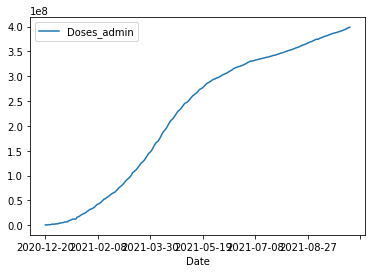

In [479]:
vacs[vacs['Country_Region'] == 'US'].plot(x='Date', y='Doses_admin')

Since the curve is always increasing, this plot suggests that the `Doses_admin` column contains the *cumulative* number of doses administered, and this is indeed what the column is *supposed* to be. However, you shouldn't *assume* that the reported vaccination rates are actually cumulative. For example, let's look at the plot for Afghanistan:

<AxesSubplot:xlabel='Date'>

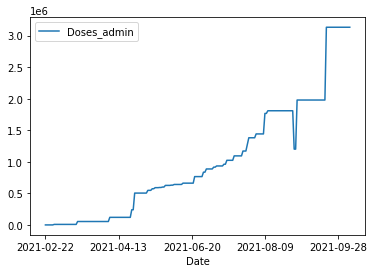

In [480]:
vacs[vacs['Country_Region'] == 'Afghanistan'].plot(x='Date', y='Doses_admin')

Notice the dip in late August? Unless there were *negative* doses administered (which would be awkward), we must concluded that the data is messy -- there will be instances where, either due to errors in reporting or in recording, the cumulative number of doses actually *decreases* from one day to the next.

**Question 1.** *(Checkpoint Question)* Is this kind of messiness common? First, write a function named `is_monotonic` which accepts a 1-d numpy array and returns `True` if every entry in the array (except the first) is greater than or equal to the previous entry, and `False` otherwise.

*Hint*: There's a numpy function for computing the difference between consecutive elements of an array.

Next, create a function named `monotonic_by_country` which accepts a dataframe like `vacs` and returns a dataframe with one row for each country/region and three bool columns -- `Doses_admin_monotonic`, `People_partially_vaccinated_monotonic`, and `People_fully_vaccinated_monotonic`. An entry in the `Doses_admin` column should be `True` if the country's `Doses_admin` is monotonically increasing and `False` otherwise; likewise for the other columns. The index of the returned dataframe should contain country names.

*Hint* No looping is allowed, but `.groupby` is your friend. Can you use the `is_monotonic` function?

In [481]:
def is_monotonic(pda):
    return np.all(np.diff(pda) >= 0)

#is_monotonic(np.asarray([1,2,3,4,4,5,6,7,8]))

In [482]:
def monotonic_by_country(vacs):
    sol = pd.DataFrame()
    sol = sol.assign(Doses_admin_monotonic = pd.Series(vacs.groupby("Country_Region")["Doses_admin"].apply(is_monotonic).values))
    sol = sol.assign(People_partially_vaccinated_monotonic = pd.Series(vacs.groupby("Country_Region")["People_partially_vaccinated"].apply(is_monotonic).values))
    sol = sol.assign(People_fully_vaccinated_monotonic = pd.Series(vacs.groupby("Country_Region")["People_fully_vaccinated"].apply(is_monotonic).values))
    sol = sol.assign(Country_Region = pd.Series(np.unique(vacs["Country_Region"])))
    sol = sol.set_index("Country_Region")
    return sol
    
#monotonic_by_country(vacs)

In [483]:
# run this to see the result, and don't change this cell -- it is used by the tests
mono = monotonic_by_country(vacs)
mono

,Doses_admin_monotonic,People_partially_vaccinated_monotonic,People_fully_vaccinated_monotonic
Country_Region,,,
Afghanistan,False,False,True
Albania,True,True,True
Algeria,False,False,False
Andorra,True,True,True
Angola,True,True,True
...,...,...,...
Venezuela,False,False,True
Vietnam,True,True,False
World,False,False,False


In [484]:
grader.check("q1")

q1 results: All test cases passed!

If you've coded this right, you should see that it is not rare for the data to violate the monotonicity assumption. We'll have to take this into account when doing our data analysis.

**Question 2**. *(Checkpoint Question)* We'd like to get the total number of doses administered, people partially vaccinated, and people fully vaccinated for each country. If the data were truly monotonic, we could simply group by country and find the maximum within each group and within each column -- this would be the overall cumulative. However, if the data has errors that make it not monotonically-increasing, there could be a noisy "spike" in the graph, so that the maximum may be an unfaithful measure of the total number of doses. Instead of the maximum, we should use something more robust, such as the 97th percentile.

Create a function named `robust_totals` that accepts a dataframe like `vacs` above and returns a dataframe with one row for each country/region and three columns -- `Doses_admin`, `People_partially_vaccinated`, and `People_fully_vaccinated` -- where an entry in the `Doses_admin` column is the 97th percentile of the values in that column for that country; likewise for the other columns. The index of the returned dataframe should contain country names.

In [485]:
def robust_totals(vacs):
    sol = vacs.groupby("Country_Region").quantile(.97)
    sol = sol.drop(["UID"], axis = 1)
    return sol
    
#robust_totals(vacs)

In [486]:
# run this to see the result, and don't change this cell -- it is used by the tests
tots = robust_totals(vacs)
tots

/var/folders/s1/y8hjc_rd18g3zw5xh5l4_y8r0000gn/T/ipykernel_52972/2559559747.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  sol = vacs.groupby("Country_Region").quantile(.97)


,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
Country_Region,,,
Afghanistan,3.133227e+06,8.111190e+05,4.307440e+05
Albania,1.723907e+06,9.413937e+05,7.825137e+05
Algeria,1.408292e+07,6.017036e+06,4.174623e+06
Andorra,9.591800e+04,5.291000e+04,4.300800e+04
Angola,3.134137e+06,2.127405e+06,1.006732e+06
...,...,...,...
Venezuela,1.571486e+07,9.731808e+06,5.983049e+06
Vietnam,4.115304e+07,3.217164e+07,8.981400e+06
World,6.146343e+09,3.461784e+09,2.550572e+09


In [487]:
grader.check("q2")

q2 results: All test cases passed!

We'd like to compute for each country/region the number of people vaccinated as a percentage of the total population. To this end, we have downloaded a CSV file containing the population of every country/region in the world:

In [488]:
pops_raw = pd.read_csv('data/populations.csv')
pops_raw

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,440,297,825",0.39 %,5540090,153,"9,388,211","-348,399.0",1.7,38,61 %,18.47 %
1,India,"1,382,345,085",0.99 %,13586631,464,"2,973,190","-532,687.0",2.2,28,35 %,17.70 %
2,United States,"331,341,050",0.59 %,1937734,36,"9,147,420","954,806.0",1.8,38,83 %,4.25 %
3,Indonesia,"274,021,604",1.07 %,2898047,151,"1,811,570","-98,955.0",2.3,30,56 %,3.51 %
4,Pakistan,"221,612,785",2.00 %,4327022,287,"770,880","-233,379.0",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,"4,993",0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,"3,497",3.05 %,103,0,"12,170",NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,"1,628",0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,"1,360",1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


**Question 3**. Unfortunately, this table's data types require some cleaning. All of the columns except the first are numeric and should either be integers or floats, as appropriate, but many of them are being stored as strings. Additionally, some rows have missing values.

Create a function named `fix_dtypes` which accepts a dataframe like `pop_raw` above and returns a data frame with exactly the same columns and rows, but with the data types "fixed" to be appropriate for the data contained within. In addition, ensure that all missing values are represented by NaNs. All percentages should be represented as decimals -- e.g., 27% should be 0.27.

*Hint*: you can make helper functions! It's OK to loop over the columns of the table. And remember that NaNs *must* be represented as floats, so even if the value in a column look like integers, if the column must contain NaNs then the dtype must be a float type.

As always, make sure that your function does not change the dataframe it is called with!

In [489]:
def fix_dtypes(pop_raw):
    temp = pop_raw.copy()
    temp = temp.applymap(lambda x: 'NaN' if pd.isnull(x) else x)
    cols = temp.columns

    def helper(x):
        if '%' in str(x):
            x = str(x).strip("%")
            x = float(x)/100
        if ',' in str(x):
            x = str(x).replace(",", '')
        if str(x) == 'N.A.':
            x = np.NaN
        if str(x).isnumeric():
            x = int(x)
        if '.' in str(x):
            if str(x).replace('.','',1).isnumeric():
                x = float(x)
        return x

    for i in cols:
        temp[i] = temp[i].apply(helper)
        if temp[i].isnull().values.any() == True:
            temp[i].astype(float)

    return temp

In [490]:
# run this to see the result, and don't change this cell -- it is used by the tests
pops = fix_dtypes(pops_raw)
pops

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.0039,5540090,153,9388211,-348399.0,1.7,38.0,0.61,0.1847
1,India,1382345085,0.0099,13586631,464,2973190,-532687.0,2.2,28.0,0.35,0.1770
2,United States,331341050,0.0059,1937734,36,9147420,954806.0,1.8,38.0,0.83,0.0425
3,Indonesia,274021604,0.0107,2898047,151,1811570,-98955.0,2.3,30.0,0.56,0.0351
4,Pakistan,221612785,0.0200,4327022,287,770880,-233379.0,3.6,23.0,0.35,0.0283
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.0006,3,50,100,NaN,NaN,NaN,0.10,0.0000
231,Falkland Islands,3497,0.0305,103,0,12170,NaN,NaN,NaN,0.66,0.0000
232,Niue,1628,0.0068,11,6,260,NaN,NaN,NaN,0.46,0.0000
233,Tokelau,1360,0.0127,17,136,10,NaN,NaN,NaN,0.00,0.0000


In [491]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4**. Remember that our goal is to compute the percentage of people vaccinated in each country/region. Our next step is to take the population numbers from the previous problem and insert them into the table of vaccination numbers. In principle this is a simple `concat` or `merge`, but there's a problem: the names of the countries/regions are not always the same in each table.

First, create a function `missing_in_pops` which takes in two tables, the first, like `tots` above, containing the total number of vaccinations per country/region, and the second like `pops` above, containing the population of each country/region. It should return a Python `set` of names that appear in `tots` but not in `pops`.

*Hint*: Pandas indexes have a method that checks if each element of the index is a member of some other collection.

By running your function, you'll see that there are 11 countries/regions in `tots` that do not appear in `pops`. It turns out that most of these countries *do* appear in `pops`, just under a different name or spelling. Using the power of Google or your domain knowledge, combined with exploring the `tots` table, write a function named `fix_names` that accepts one argument -- a table like `pops` -- and returns a copy of `pops`, but with the 
"Country (or dependency)" column changed so that all countries that appear in `tots` also appear in the result, with a few exceptions listed below. For example, the country "Burma" appears in `tots`, but is listed as "Myanmar" in `pops`. In the table returned by your function, "Myanmar" should be changed to "Burma" to match `tots`.

As noted above, there are a few exceptions:

- Kosovo does not appear in `pops`. You do not need to change an entry in `pops` to match it.
- There is a region simply called "World". This doesn't appear in `pops`. You do not need to change an entry in `pops` to match it.
- There is "US" and "US (Aggregate)" in `tots` but neither appear in `pops`. You only need to match "US", and can leave "US (Aggregate)" unmatched.

In [492]:
def missing_in_pops(tots, pops):
    diff = tots.index.difference(pops['Country (or dependency)'].values.tolist())
    return set(diff)    

In [493]:
def fix_names(pops):
    temp = pops.copy()
    temp['Country (or dependency)'].loc[temp['Country (or dependency)'] == 'Myanmar'] = 'Burma'
    temp['Country (or dependency)'].loc[temp['Country (or dependency)'] == 'South Korea'] = 'Korea, South'
    temp['Country (or dependency)'].loc[temp['Country (or dependency)'] == 'United States'] = 'US'
    temp['Country (or dependency)'].loc[temp['Country (or dependency)'] == 'Czech Republic (Czechia)'] = 'Czechia'
    temp['Country (or dependency)'].loc[temp['Country (or dependency)'] == 'Saint Kitts & Nevi'] = 'Saint Kitts and Nevis'
    temp['Country (or dependency)'].loc[temp['Country (or dependency)'] == "Côte d'Ivoire"] = "Cote d'Ivoire"
    temp['Country (or dependency)'].loc[temp['Country (or dependency)'] == 'St. Vincent & Grenadines'] = 'Saint Vincent and the Grenadines'
    temp['Country (or dependency)'].loc[temp['Country (or dependency)'] == 'Sao Tome & Principe'] = 'Sao Tome and Principe'

    return temp

In [494]:
# run this to see the result, and don't change this cell -- it is used by the tests
missing = missing_in_pops(tots, pops)
missing

{'Burma',
 "Cote d'Ivoire",
 'Czechia',
 'Korea, South',
 'Kosovo',
 'Saint Kitts and Nevis',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'US',
 'US (Aggregate)',
 'World'}

In [495]:
# run this to see the result, and don't change this cell -- it is used by the tests
pops_fixed = fix_names(pops)
pops_fixed

/opt/homebrew/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.0039,5540090,153,9388211,-348399.0,1.7,38.0,0.61,0.1847
1,India,1382345085,0.0099,13586631,464,2973190,-532687.0,2.2,28.0,0.35,0.1770
2,US,331341050,0.0059,1937734,36,9147420,954806.0,1.8,38.0,0.83,0.0425
3,Indonesia,274021604,0.0107,2898047,151,1811570,-98955.0,2.3,30.0,0.56,0.0351
4,Pakistan,221612785,0.0200,4327022,287,770880,-233379.0,3.6,23.0,0.35,0.0283
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.0006,3,50,100,NaN,NaN,NaN,0.10,0.0000
231,Falkland Islands,3497,0.0305,103,0,12170,NaN,NaN,NaN,0.66,0.0000
232,Niue,1628,0.0068,11,6,260,NaN,NaN,NaN,0.46,0.0000
233,Tokelau,1360,0.0127,17,136,10,NaN,NaN,NaN,0.00,0.0000


In [496]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5**. Create a function named `top_k_fully_vaccinated` that accepts three arguments: a dataframe like `tots`, a dataframe like `pops_fixed`, and a number, `k`, and returns a pandas Series of the $k$ ten vaccination rates (number of fully vaccinated divided by total population) of any country/region, sorted in descending order. The index of the Series should be the country/region name, and the rates should be decimal numbers between 0 and 1.

In [497]:
def top_k_fully_vaccinated(tots, pops_fixed, k):
    tots_copy = tots.copy()
    pf_copy = pops_fixed.copy()
    temp = pf_copy.merge(tots_copy.reset_index(), right_on = "Country_Region", left_on = "Country (or dependency)")
    temp["pfv"] = temp["People_fully_vaccinated"] / temp["Population (2020)"]
    
    sol = temp.nlargest(k, "pfv")
    locations = sol["Country (or dependency)"]
    vals = sol["pfv"].values
    return pd.Series(index = locations, data = vals)

In [498]:
# run this to see the result, and don't change this cell -- it is used by the tests
top_k = top_k_fully_vaccinated(tots, pops_fixed, 10)
top_k

Country (or dependency)
Malta                   0.951735
Portugal                0.847342
United Arab Emirates    0.827612
Iceland                 0.806412
Spain                   0.780399
Singapore               0.776914
Qatar                   0.767765
Denmark                 0.752568
Ireland                 0.742408
Uruguay                 0.739208
dtype: float64

In [499]:
grader.check("q5")

q5 results: All test cases passed!

# Part 2: Vaccine effectiveness and misleading statistics

There has naturally been much interest in the effectiveness of COVID-19 vaccines. In particular, recent reports suggest that the effectiveness of vaccines -- and the Pfizer vaccine in particular -- may *wane* over time. While this is true, the public perception of declining vaccine effectiveness has been affected by what is often a poor use of statistics by media outlets.

For example, take the following blurb from [this article](https://www.cbc.ca/news/world/israel-covid-delta-variant-booster-1.6159472) on the Canadian Broadcasting Corporation's website (emphasis added):

> Meanwhile, Israeli health officials reported what appeared to be a waning efficacy of the vaccine, including among those who had been double vaccinated. **Data showed that of the serious cases being admitted to hospital, around 60 per cent of patients were people who had been fully vaccinated**, though most were over 60 or with underlying health conditions.

This stat sounds terrible -- if you're sick in a hospital bed with COVID-19, you're actually more likely to be vaccinated than not! If you're not a data scientist, you might come away with the conclusion that the vaccine is no longer effective against serious illness, or -- even worse -- that getting the vaccine will *increase* your risk of sickness. Of course, this statistic by itself is actually meaningless. For instance, imagine a world in which 100% of people are vaccinated. Then 100% of people admitted to the hospital will be vaccinated, too!

What we really care about is not the probability of being vaccinated if you're hospitalized, but the probability of being hospitalized if you're vaccinated. More than that, what we care most about is how this probability relates to the probability of severe illness if you're *unvaccinated*. To put it more concretely, let's say that 1 in 100 vaccinated people are hospitalized, while 10 in 100 unvaccinated people are hospitalized. This means that unvaccinated people are 10x more likely to be hospitalized than unhospitalized. To put it another way, if those 10 hospitalized unvaccinated people had been vaccinated, we'd expect that 9 of them would not have developed severe illness. That is, the vaccine would have prevented 90% of the severe illnesses, and we might therefore say that it is 90% effective against severe illness.

This is the intuition behind the definition of *vaccine effectiveness*; (see the CDC's [page](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section6.html) for more information). That is, to compute a vaccine's effectiveness, we need to know two things:

1. the proportion of vaccinated people who developed severe illness (i.e., the probability of severe illness given vaccination). Call this $p_v$.
2. the proportion of unvaccinated people who developed severe illness (i.e., the probability of severe illness given not vaccinated). Call this $p_u$.

Then:

$$
\text{effectiveness} = 1 - \frac{p_v}{p_u} = \frac{p_u - p_v}{p_u}
$$

What this formula calculates, in words, is the proportion of unvaccinated people with severe illness who would (we expect) not have severe illness if they were vaccinated. For instance, if no one who is vaccinated gets severely sick, then $p_v = 0$ and the effectiveness is 100%. On the other hand, if the vaccine is no better than being unvaccinated, $p_v = p_u$ and the effectiveness is 0%.


Many news articles report effectiveness numbers, and this is certainly better than reporting the percentage of hospital patients that are vaccinated. Note, though, that there are different types of effectiveness -- effectiveness against severe illness, effectiveness against symptomatic illness, effectiveness against death -- and articles often are vague about which they are using. But even then, effectiveness can *still* be misleading due to statistical quirks, as we'll now see.

For this investigation, we'll download a data set of vaccine effectiveness in Israel through mid-summer 2021. The proportions of illness and vaccinations in the data set are real. Israel was mostly vaccinated using the Pfizer vaccine, and was one of the first places where lots of data on the Delta variant was gathered.

In [500]:
# download Israeli covid vaccinations data from the ☁️
if not pathlib.Path('./data/israel.csv').exists():
    urllib.request.urlretrieve(
        'https://f000.backblazeb2.com/file/dsc-data/covid-israel/israel.csv',
        './data/israel.csv'
    )

In [501]:
israel_raw = pd.read_csv('data/israel.csv')
israel_raw

,Age,Vaccinated,Severe Sickness
0,23,1,0
1,60,1,0
2,43,1,0
3,40,1,0
4,71,1,0
...,...,...,...
6937537,14,1,0
6937538,30,1,0
6937539,18,0,0
6937540,45,1,0


Each row in the data set is a person. Some are vaccinated (marked with a 1 in the "Vaccinated" column), and some became severely ill (marked with a 1 in the "Severe Sickness" column).

As always, we first check that the data is clean.

In [502]:
israel_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937542 entries, 0 to 6937541
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Age              object
 1   Vaccinated       int64 
 2   Severe Sickness  int64 
dtypes: int64(2), object(1)
memory usage: 158.8+ MB


**Question 6**. *(Checkpoint Question)* If you look at the types of each column in `israel_raw`, you'll see that the "Age" column has a dtype of `object`. If you investigate further, you will see that a special value has been used to indicate that some ages are missing. Write a function named `clean_israel_data` that accepts a data frame like `israel_raw` and returns a *new* dataframe where the missing values are replaced by NaNs and the "Age" column's data type is `float`. Furthermore, the "Vaccinated" and "Severe Sickness" columns should be stored as bools. The shape of the returned data frame should be the same as `israel_raw`, and, as usual, your function should not modify the input argument.

In [503]:
def clean_israel_data(israel_raw):
    sol = israel_raw.copy()
    sol = sol.replace({"-": np.NaN, 1: True, 0: False})
    sol["Age"] = sol["Age"].astype(float)
    return sol

In [504]:
# run this to see the result, and don't change this cell -- it is used by the tests
israel = clean_israel_data(israel_raw)
israel

,Age,Vaccinated,Severe Sickness
0,23.0,True,False
1,60.0,True,False
2,43.0,True,False
3,40.0,True,False
4,71.0,True,False
...,...,...,...
6937537,14.0,True,False
6937538,30.0,True,False
6937539,18.0,False,False
6937540,45.0,True,False


In [505]:
grader.check("q6")

q6 results: All test cases passed!

We now need to decide what to do with the missing values. Can we simply drop those rows? First, let's look at whether the missing values might be MCAR, NMAR, missing by design, etc. We'll first check to see if the distribution of the other columns differs depending on whether the ages are missing or not:

In [506]:
israel.groupby(israel['Age'].isna()).mean()

,Age,Vaccinated,Severe Sickness
Age,,,
False,41.036,0.812204,0.000074
True,NaN,0.805164,0.000000


**Question 7**. Because the vaccination rate and severe sickness rate appear to be about the same, whether or not "Age" is missing, we hypothesize that "Age" is MCAR (missing completely at random). To check, write a function named `mcar_permutation_tests` that accepts two arguments -- a dataframe like `israel` and a number `n_permutations` of permutations -- and runs the two permutation tests described below. Your function should return a 2-tuple where the first entry is an array of the simulated test statistics for the first permutation test, and the second entry is an array of simulated test statistics for the second permutation test.

The first permutation test should check the null hypothesis that values in the "Vaccinated" column for rows where the "Age" was missing were drawn from the same distribution as the values in rows where "Age" was not missing. The alternative hypothesis should be that they were drawn from *different* distributions. As your test statistic, use the difference in group means. The second permutation test should do the same, but for the "Severe Sickness" column.

*Note*: your code should finish in lest than two minutes when called with `n_permutations=100`.

Lastly, create a function named `missingness_type` that takes no arguments and returns a single integer corresponding to the option below that you think describes the type of missingess in this data:

1. MCAR (Missing completely at random)
2. MAR (Missing at random)
3. NMAR (Not missing at random)
4. Missing by design

In [507]:
def mcar_permutation_tests(israel, n_permutations):
    temp = israel.copy()
    test1 = np.array([])
    test2 = np.array([])
    for i in range(n_permutations):
        sampled = temp["Age"].sample(frac = 1, replace = False).reset_index(drop = True)
        shuffled = temp.assign(**{"Age": sampled})
        
        group_shuffle = shuffled.groupby(shuffled["Age"].isna()).mean()
        test1 = np.append(test1, group_shuffle.iloc[:,1][0] - group_shuffle.iloc[:,1][1])
        test2 = np.append(test2, group_shuffle.iloc[:,2][0] - group_shuffle.iloc[:,2][1])
    
    return (test1, test2)
    

In [508]:
def missingness_type():
    return 1

In [509]:
# run this to see the result, and don't change this cell -- it is used by the tests
test_stats_vax, test_stats_sick = mcar_permutation_tests(israel, 100)

In [510]:
grader.check("q7")

q7 results: All test cases passed!

Let's proceed by simply dropping the rows with missing values:

In [511]:
vax = israel.dropna()

**Question 8**. *(Checkpoint Question)* Write a function, `effectiveness`, that accepts a dataframe like `vax` above, and returns the effectiveness of the vaccine against severe illness.

In [512]:
def effectiveness(vax):
    if vax[vax["Vaccinated"] == True].shape[0] == 0:
        return np.NaN

    if vax[vax["Vaccinated"] == False].shape[0] == 0:
        return np.NaN

    pv = vax[(vax["Vaccinated"] == True) & (vax["Severe Sickness"] == True)].shape[0] / vax[vax["Vaccinated"] == True].shape[0]
    pu = vax[(vax["Vaccinated"] == False) & (vax["Severe Sickness"] == True)].shape[0] / vax[vax["Vaccinated"] == False].shape[0]

    if pu == 0.0:
        return np.NaN
    else:
        return (1 - pv/pu)

In [513]:
# run this to see the result, and don't change this cell -- it is used by the tests
eff_overall = effectiveness(vax)
eff_overall

0.6747820515830074

In [514]:
grader.check("q8")

q8 results: All test cases passed!

If you coded your function right, you should see a vaccine effectiveness in the 60s. This is OK, but not great! It means that the vaccine is only around 60-70% effective at preventing severe illness overall.

But remember Simpson's Paradox, which roughly says that sometimes a result that appears in aggregated data disappears when we look at disaggregated data. So let's disaggregate the data and perform the same calculation. That is, let's compute the effectiveness of the vaccine within each of several age groups. For convenience, here is a list of the age groups we'll consider:

In [515]:
AGE_GROUPS = [
    '12-15',
    '16-19',
    '20-29',
    '30-39',
    '40-49',
    '50-59',
    '60-69',
    '70-79',
    '80-89',
    '90-'
]

Each string above lists an age group. For example, the age group `12-15` should contain anyone aged 12, 13, 14, or 15. The last age group, '90-', denotes everyone who is 90 or above.

**Question 9**. Write a function named `stratified_effectiveness` that accepts one argument -- a dataframe like `vax` -- and returns the effectiveness of the vaccine within each of the age groups in `AGE_GROUPS`. The return value of the function should be a Series of the same length as `AGE_GROUPS`, with the index of the series being the age group as a string.

In [516]:
vax

,Age,Vaccinated,Severe Sickness
0,23.0,True,False
1,60.0,True,False
2,43.0,True,False
3,40.0,True,False
4,71.0,True,False
...,...,...,...
6937537,14.0,True,False
6937538,30.0,True,False
6937539,18.0,False,False
6937540,45.0,True,False


In [517]:
def stratified_effectiveness(vax):
    complete = vax.copy()
    sol = list()
    ages = list()
    for i in AGE_GROUPS:
        min_val = int(i[:i.index("-")])
        
        if i[-1] != "-":
            ages.append((min_val, int(i[i.index("-") + 1:])))
        else:
            ages.append((min_val, float("inf")))
    
    for i in ages:
        temp = complete[(complete["Age"] >= i[0]) & (i[1] >= complete["Age"])]
        sol.append(effectiveness(temp))
        
    return pd.Series(sol, index = AGE_GROUPS)

#stratified_effectiveness(vax)

In [518]:
# run this to see the result, and don't change this cell -- it is used by the tests
s_eff = stratified_effectiveness(vax)
s_eff

12-15    1.000000
16-19    1.000000
20-29    1.000000
30-39    0.966591
40-49    0.941211
50-59    0.926886
60-69    0.886400
70-79    0.895772
80-89    0.810277
90-      0.924404
dtype: float64

In [519]:
grader.check("q9")

q9 results: All test cases passed!

If done correctly, you should notice that the effectiveness of the vaccine within each age group is higher than the overall effectiveness. In fact, the effectiveness of every age group is above 80%, and most age groups are around 90% or more.

This is an instance of Simpson's Paradox. This result might seem strange, or even impossible -- how can *every one* of the age groups see a higher effectiveness rate than the overall effectiveness rate? We'll take a deeper look at this in the next question, but for now let's consider a slightly different scenario where we can give dosages of a vaccine on a scale, so that some people can receive more vaccine than others. We expect that the higher a dosage someone receives, the less sick they become. But suppose we plot the data and we see something like this:

<img src="./data/simpsons-aggregated.svg">

It actually looks like the more dosage someone receives, the more sick they get! But suppose we were to *disaggregate* the data into two age groups -- old and young. That is, let's look at the same plot, but now mark young people as red and older people as purple. We might see this:

<img src="./data/simpsons.svg">

Now we see a different story: the larger the dosage, the less the sickness within each age group. Therefore, while the overall trend is a *positive* relationship between dosage and sickness, the within-group trends are all negative, as we'd hope. The reason for this difference comes from the fact that, for each dosage level, the sickness rate of older people is greater than the sickness rate for younger people.

If our data gives different answers depending on how we aggregate it, which answer should we use? In this case, we don't care about overall effectiveness -- we care about how effective the vaccine will be for an *individual*. The data shows that, no matter what your age, unvaccinated people are ten times as likely to develop severe illness than vaccinated people, and it shows that the vaccine's effectiveness against severe illness is still quite strong.

The plots above may help to understand Simpson's Paradox a little bit more, but it may still be unclear how each age group's effectiveness rate can be higher than the overall effectiveness rate. To explore this in more depth, we'll build a calculator that takes in several parameters and calculates three effectivenesses: the overall, aggregate effectiveness, the effectiveness among young people, and the effectiveness among old people. For simplicity, we'll assume that there are just as many old people as young people.

To calculate these effectivenesses, you need to know six numbers:

1. The percentage of young people that are vaccinated.
2. The percentage of old people that are vaccinated.
3. The probability that a young vaccinated person will be hospitalized
4. The probability that a young *un*vaccinated person will be hospitalized
5. The probability that an old vaccinated person will be hospitalized
6. The probability that an old *un*vaccinated person will be hospitalized

Given these six pieces of information, you can calculate the overall effectiveness, the effectiveness in young people, and the effectiveness in old people. One approach is to use the probability theory you learned in DSC 40A (specifically, your knowledge of conditional probabilities). Another approach is to fix concrete numbers -- say, assume that there are 1000 old people and 1000 young people -- and calculate the effectivenesses with these concrete numbers. For instance, if you want to calculated the effectiveness of the vaccine in young people, you newed to know how many young vaccinated people are severely ill and how many young unvaccinated people are severely ill. If you're told that 20% of young people are vaccinated, and that a young vaccinated person has a 10% chance of severe illness, then it means that 200 young people are vaccinated and 10% of them (20 people) are severely ill. You can do the same to find the number of young unvaccinated people that are severely ill, and then combine this information to compute effectiveness in young people.

*Hint*: working with concrete numbers like this *is* using probability theory, just with extra steps. But it might be less abstract and easier to reason about.

**Question 10**.  *(Checkpoint Question)* Create a function that takes in the six numbers above and outputs the effectivenesses. This will allow you to experiment with Simpson's Paradox by plugging in different values and seeing what happens. Create a function named `effectiveness_calculator` that accepts 6 arguments:

1. `young_vaccinated_pct`: The percentage of young people that are vaccinated.
2. `old_vaccinated_pct`: The percentage of old people that are vaccinated.
3. `young_risk_vaccinated`: The probability that a young vaccinated person will be hospitalized
4. `young_risk_unvaccinated`: The probability that a young *un*vaccinated person will be hospitalized
5. `old_risk_vaccinated`: The probability that an old vaccinated person will be hospitalized
6. `old_risk_unvaccinated`: The probability that an old *un*vaccinated person will be hospitalized

It should return a `dict` with three keys: `Overall`, `Young`, and `Old`, whose values are the overall effectiveness, the effectiveness within young people, and the effectiveness within old people, respectively.

*Note*: all percentages and probabilities should be decimals between 0 and 1.

In [520]:
def effectiveness_calculator(young_vaccinated_pct, old_vaccinated_pct, young_risk_vaccinated, young_risk_unvaccinated, old_risk_vaccinated, old_risk_unvaccinated):
    young = (young_risk_unvaccinated - young_risk_vaccinated) / young_risk_unvaccinated
    old = (old_risk_unvaccinated - old_risk_vaccinated) / old_risk_unvaccinated
    vax_risk = (young_risk_vaccinated * young_vaccinated_pct + old_vaccinated_pct * old_risk_vaccinated)
    unvax_risk = (young_risk_unvaccinated * (1 - young_vaccinated_pct) + (1 - old_vaccinated_pct) * old_risk_unvaccinated) / (old_vaccinated_pct + young_vaccinated_pct)
    overall = (unvax_risk - vax_risk) / unvax_risk
    
    return {'Overall': overall, 'Young': young, 'Old': old}

In [521]:
# run this to see the result, and don't change this cell -- it is used by the tests
eff_example = effectiveness_calculator(
    young_vaccinated_pct=.01,
    old_vaccinated_pct=.99,
    young_risk_vaccinated=.01,
    young_risk_unvaccinated=.20,
    old_risk_vaccinated=.10,
    old_risk_unvaccinated=.50
)
eff_example

{'Overall': 0.5118226600985222, 'Young': 0.95, 'Old': 0.8}

In [522]:
grader.check("q10")

q10 results: All test cases passed!

It might be helpful to think about the result of your effectiveness calculator. In the example above, we have constructed an extreme situation where essentially all older people are vaccinated, but almost no younger people are. Therefore, when calculating the overall vaccine effectiveness, we're using the probability of illness given vaccination -- which is essentially the probability of severe illness if you're old -- and comparing it to the probability of severe illness if you're unvaccinated, which is essentially the probability of severe illness if you're young.

In fact, it is possible to create an example where the overall effectiveness is negative (taking the vaccine is worse than not taking it!), but where the effectiveness within groups is above 80%. The next question asks you to do just this.

**Question 11**. Create a function named `extreme_example` that accepts no arguments and returns a dictionary whose keys are the arguments to the function `effectiveness_calculator` above. When your function is called and the dictionary is passed to `effectiveness_calculator`, it should return an Overall effectiveness that is negative and a Young and Old effectiveness of >80% each.

In [523]:
def extreme_example():
    keys = ["young_vaccinated_pct", "old_vaccinated_pct", "young_risk_vaccinated", "young_risk_unvaccinated", "old_risk_vaccinated", "old_risk_unvaccinated"]
    #vals = [0.90, 0.90, 0.05, 0.70, 0.10, 0.80]
    vals = [0.90, 0.90, 0.05, 0.80, 0.10, 0.80]
    return {keys[i]: vals[i] for i in range(len(keys))}

In [524]:
# run this to see the result, and don't change this cell -- it is used by the tests
eff_extreme = effectiveness_calculator(**extreme_example())
eff_extreme

{'Overall': -0.5187500000000003, 'Young': 0.9375, 'Old': 0.875}

In [525]:
grader.check("q11")

q11 results: All test cases passed!

# Congratulations, you finished the project!

### Before you submit:
* Be sure you run the doctests on all your code with `python -m doctest project.py`

### To submit:
* **Upload the .py file to gradescope**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [526]:
grader.check_all()

q1 results: All test cases passed!

q10 results: All test cases passed!

q11 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!